In [69]:
import pandas as pd
df = pd.read_csv('ST_train.csv')

In [70]:
services_transported_df = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].copy()
services_transported_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.0,0.0,0.0,0.0,0.0,False
1,109.0,9.0,25.0,549.0,44.0,True
2,43.0,3576.0,0.0,6715.0,49.0,False
3,0.0,1283.0,371.0,3329.0,193.0,False
4,303.0,70.0,151.0,565.0,2.0,True


In [71]:
services_transported_df.shape

(8693, 6)

In [72]:
services_transported_df = services_transported_df.dropna()

In [73]:
services_transported_df.shape

(7785, 6)

In [74]:
services_transported_df['All_Zero'] =services_transported_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].eq(0).all(axis=1)
services_transported_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,All_Zero
0,0.0,0.0,0.0,0.0,0.0,False,True
1,109.0,9.0,25.0,549.0,44.0,True,False
2,43.0,3576.0,0.0,6715.0,49.0,False,False
3,0.0,1283.0,371.0,3329.0,193.0,False,False
4,303.0,70.0,151.0,565.0,2.0,True,False


In [75]:
services_transported_df['Total_Spend'] = services_transported_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
services_transported_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,All_Zero,Total_Spend
0,0.0,0.0,0.0,0.0,0.0,False,True,0.0
1,109.0,9.0,25.0,549.0,44.0,True,False,736.0
2,43.0,3576.0,0.0,6715.0,49.0,False,False,10383.0
3,0.0,1283.0,371.0,3329.0,193.0,False,False,5176.0
4,303.0,70.0,151.0,565.0,2.0,True,False,1091.0


In [76]:
def count_non_zero(row, columns):
    return sum(row[col] != 0 for col in columns)

# Columns to check for non-zero values
columns_to_check = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Apply the function to each row
services_transported_df['Non_Zero_Count'] = services_transported_df.apply(lambda row: count_non_zero(row, columns_to_check), axis=1)
services_transported_df.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,All_Zero,Total_Spend,Non_Zero_Count
0,0.0,0.0,0.0,0.0,0.0,False,True,0.0,0
1,109.0,9.0,25.0,549.0,44.0,True,False,736.0,5
2,43.0,3576.0,0.0,6715.0,49.0,False,False,10383.0,4
3,0.0,1283.0,371.0,3329.0,193.0,False,False,5176.0,4
4,303.0,70.0,151.0,565.0,2.0,True,False,1091.0,5


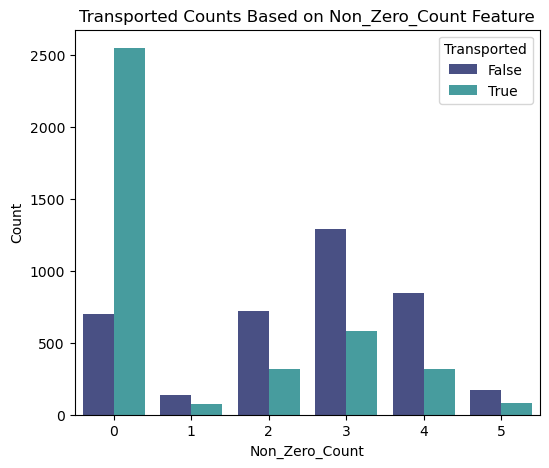

In [77]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=services_transported_df, x='Non_Zero_Count', hue='Transported', palette='mako')

plt.title('Transported Counts Based on Non_Zero_Count Feature')
plt.xlabel('Non_Zero_Count')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper right')

plt.show()

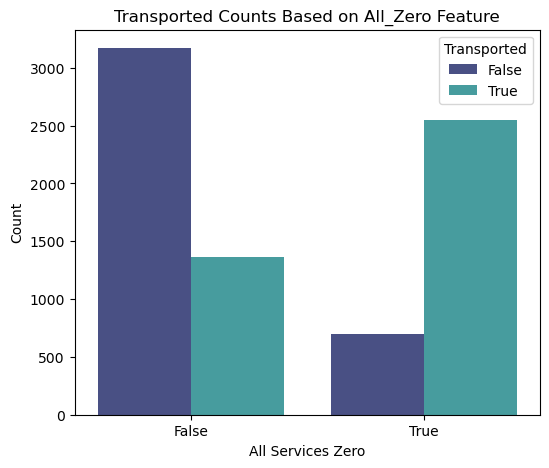

In [78]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=services_transported_df, x='All_Zero', hue='Transported', palette='mako')

plt.title('Transported Counts Based on All_Zero Feature')
plt.xlabel('All Services Zero')
plt.ylabel('Count')
plt.legend(title='Transported', loc='upper right')

plt.show()

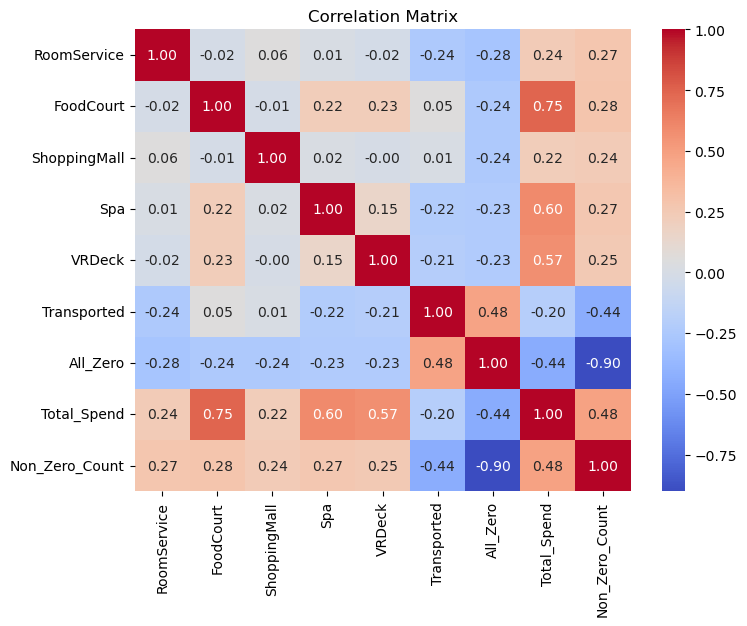

In [79]:
services_transported_df['Transported'] = services_transported_df['Transported'].astype(int)
services_transported_df['All_Zero'] = services_transported_df['All_Zero'].astype(int)

correlation_matrix = services_transported_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix')
plt.show()

In [83]:
from sklearn.feature_selection import mutual_info_classif
#from sklearn.preprocessing import LabelEncoder

# Calculate mutual information
discrete_features = [False, False, False, False, False, True, False]
mi_scores = mutual_info_classif(services_transported_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'All_Zero', 'Total_Spend']], services_transported_df['Transported'], discrete_features=discrete_features)

# Create a Series to view the mutual information scores
mi_series = pd.Series(mi_scores, index=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'All_Zero', 'Total_Spend'])

print(mi_series)

RoomService     0.080745
FoodCourt       0.044279
ShoppingMall    0.054525
Spa             0.070205
VRDeck          0.064943
All_Zero        0.118704
Total_Spend     0.129999
dtype: float64


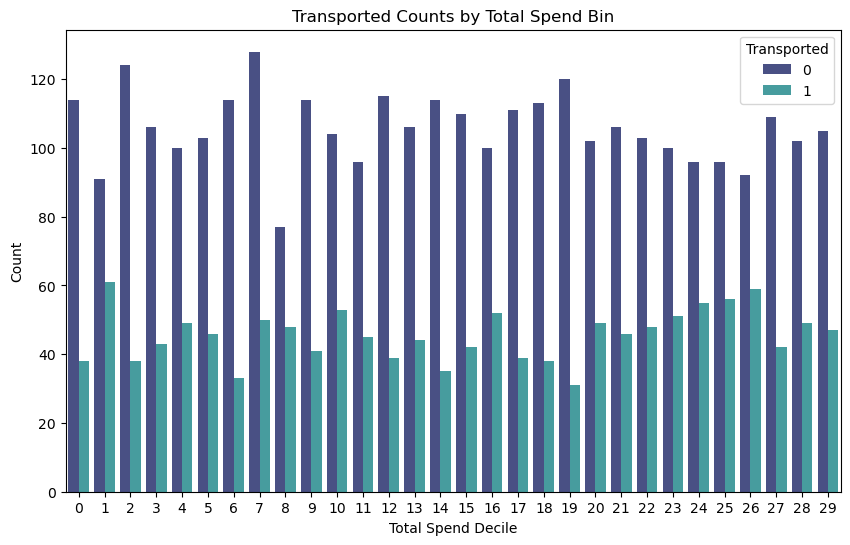

In [81]:
# Filter out rows where 'Total_Spend' is 0
non_zero_spend_df = services_transported_df[services_transported_df['Total_Spend'] > 0].copy()

# Divide the data into 10 equal bins based on 'Total_Spend'
non_zero_spend_df['spend_bin'] = pd.qcut(non_zero_spend_df['Total_Spend'], q=30, labels=False)

# Group by the new 'spend_bin' column and the 'Transported' column to get counts
transported_counts = non_zero_spend_df.groupby(['spend_bin', 'Transported']).size().reset_index(name='count')

# Create a bar plot with seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(data=transported_counts, x='spend_bin', y='count', hue='Transported', palette='mako')

plt.title('Transported Counts by Total Spend Bin')
plt.xlabel('Total Spend Decile')
plt.ylabel('Count')

plt.show()

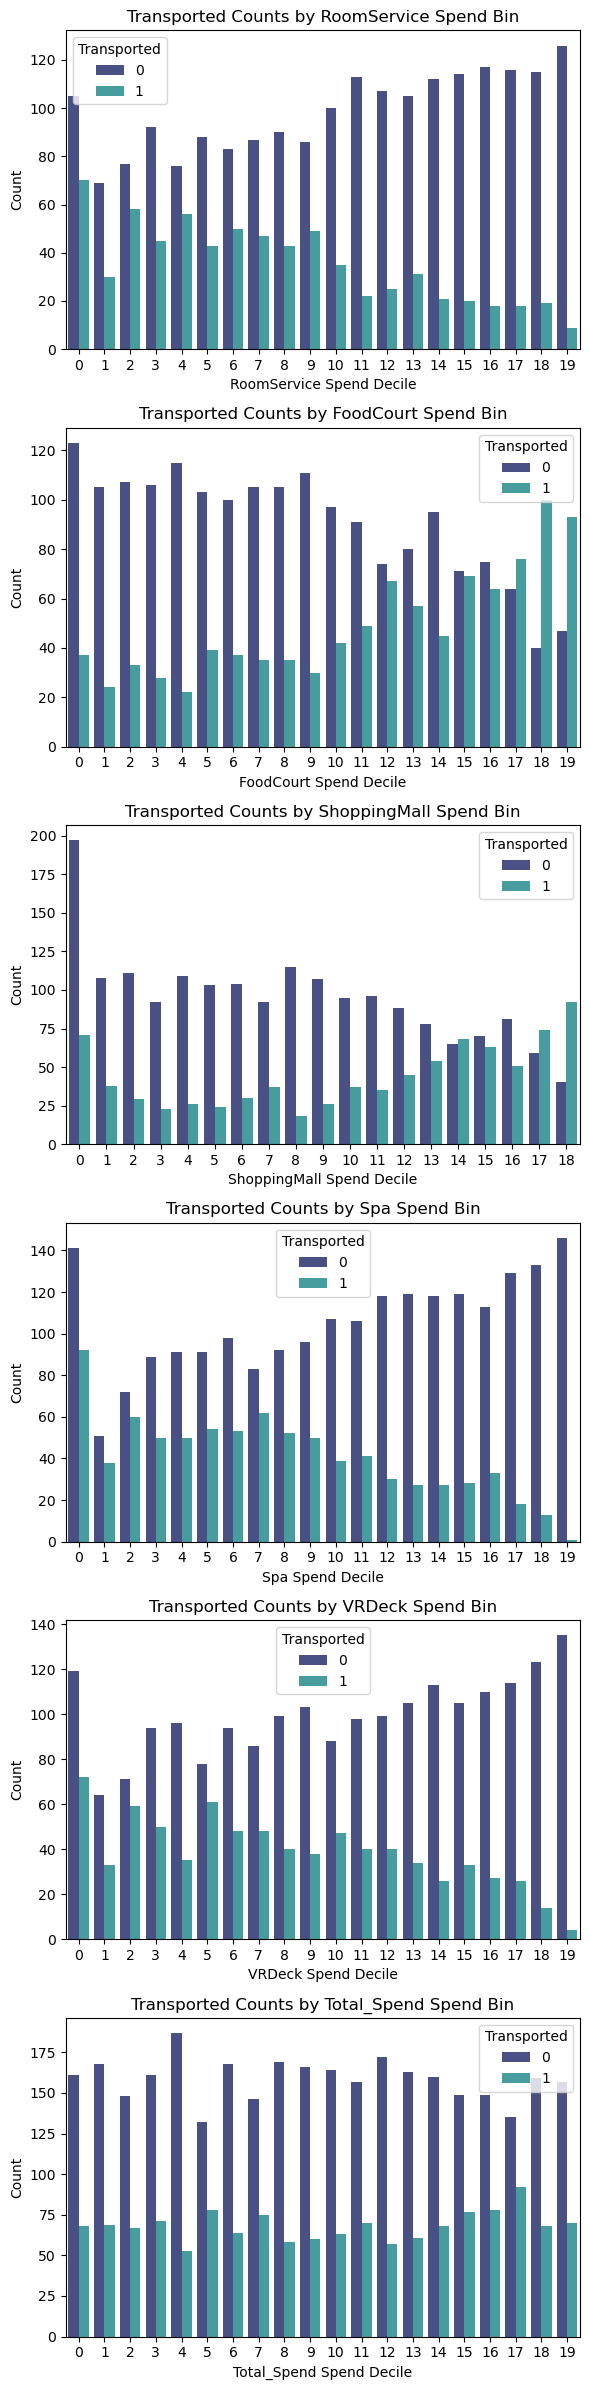

In [82]:
features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Total_Spend']
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(6, 4 * num_features))  # Adjust the size as needed

# Loop over each feature to create subplots
for i, feature in enumerate(features):
    # Filter out rows where the current feature's spend is 0
    non_zero_spend_df = services_transported_df[services_transported_df[feature] > 0].copy()
    
    # Divide the data into 10 equal bins for the current feature
    non_zero_spend_df['spend_bin'] = pd.qcut(non_zero_spend_df[feature], q=20, labels=False, duplicates='drop')
    
    # Group by the new 'spend_bin' column and the 'Transported' column to get counts
    transported_counts = non_zero_spend_df.groupby(['spend_bin', 'Transported']).size().reset_index(name='count')
    
    # Create a bar plot for the current feature subplot
    sns.barplot(data=transported_counts, x='spend_bin', y='count', hue='Transported', palette='mako', ax=axes[i])
    
    # Set subplot title and labels
    axes[i].set_title(f'Transported Counts by {feature} Spend Bin')
    axes[i].set_xlabel(f'{feature} Spend Decile')
    axes[i].set_ylabel('Count')

# Adjust layout and display plot
plt.tight_layout()
plt.show()